In [63]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix


In [64]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [65]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [66]:
df["target"] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [67]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

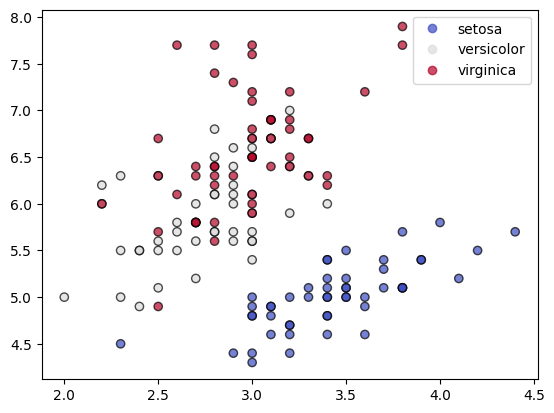

In [68]:
scatter = plt.scatter(df['sepal width (cm)'], df['sepal length (cm)'], c=df['target'], cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=list(data.target_names))

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=21,test_size=0.3)

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[-0.42129513,  1.05296369, -1.3574755 , -1.27081383],
       [-1.12907095,  1.29175675, -1.30192798, -1.40074124],
       [-1.83684677, -0.14100162, -1.46857053, -1.40074124],
       [ 0.40444333, -2.05134611,  0.42004503,  0.41824253],
       [-1.24703359,  0.81417063, -1.19083295, -1.27081383],
       [ 1.23018178,  0.09779144,  0.6422351 ,  0.41824253],
       [-1.01110831,  0.57537757, -1.30192798, -1.27081383],
       [ 0.99425651,  0.09779144,  0.36449751,  0.28831511],
       [ 2.17388288, -1.09617386,  1.75318543,  1.45766182],
       [-0.18536986, -0.61858774,  0.42004503,  0.1583877 ],
       [-0.06740722, -0.8573808 ,  0.19785496, -0.23139453],
       [-1.48295886,  0.09779144, -1.24638047, -1.27081383],
       [-0.89314568,  1.05296369, -1.30192798, -1.14088642],
       [ 2.17388288, -0.14100162,  1.3088053 ,  1.45766182],
       [-1.36499622,  0.33658451, -1.19083295, -1.27081383],
       [-0.53925777,  1.53054981, -1.24638047, -1.27081383],
       [-1.48295886,  1.

In [71]:
import math
math.sqrt(len(y_train))

10.246950765959598

In [72]:
classifier = KNeighborsClassifier(n_neighbors=11,metric='euclidean')


In [73]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [74]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 2, 2, 1,
       2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1,
       2])

In [75]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[14  0  0]
 [ 0 15  1]
 [ 0  3 12]]


In [76]:
print(accuracy_score(y_test,y_pred))

0.9111111111111111


In [77]:
y_test

array([1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1,
       1, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1,
       2])

In [78]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 2, 2, 1,
       2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1,
       2])